# Visualize the QuadTree

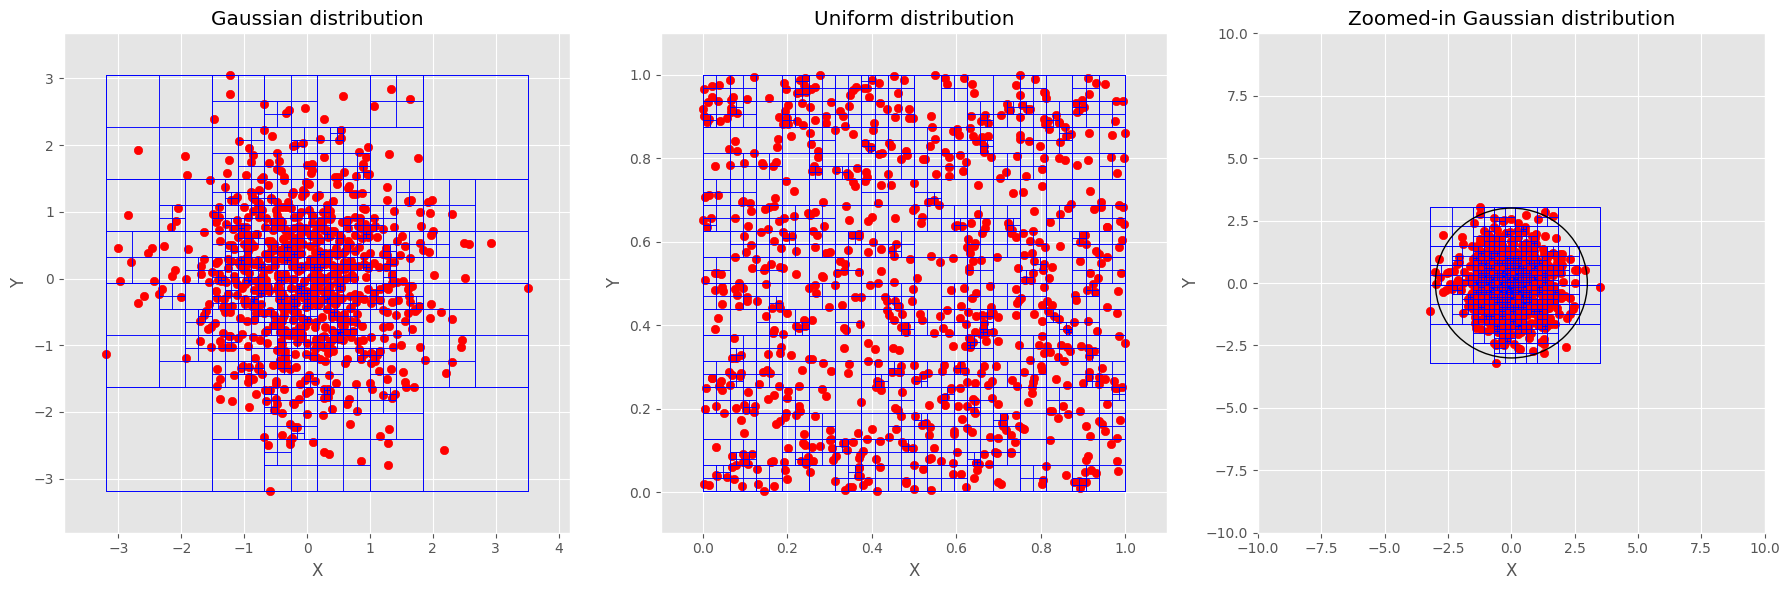

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.style.use('ggplot')


def draw_quad_tree(points_df, rectangles_df, graph_name, ax):
    points_x = points_df['pointX']
    points_y = points_df['pointY']

    rect_center_x = rectangles_df['rectCenterX']
    rect_center_y = rectangles_df['rectCenterY']
    rect_width = rectangles_df['rectWidth']
    rect_height = rectangles_df['rectHeight']

    # Plot points
    ax.scatter(points_x, points_y, color='red')

    # Plot rectangles
    for i in range(len(rectangles_df)):
        rect = patches.Rectangle(
            (rect_center_x[i] - rect_width[i] / 2,
             rect_center_y[i] - rect_height[i] / 2),
            rect_width[i],
            rect_height[i],
            linewidth=0.5,
            edgecolor='blue',
            facecolor='none',
        )
        ax.add_patch(rect)

    # Set plot limits
    ax.set_xlim(
        points_x.min() - (points_x.max() - points_x.min()) / 10,
        points_x.max() + (points_x.max() - points_x.min()) / 10
    )
    ax.set_ylim(
        points_y.min() - (points_y.max() - points_y.min()) / 10,
        points_y.max() + (points_y.max() - points_y.min()) / 10
    )

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(graph_name)


# Read points data from CSV
points_df_gaussian = pd.read_csv('QuadTreeGaussianPoints.csv')
rectangles_df_gaussian = pd.read_csv('QuadTreeGaussianRects.csv')

points_df_uniform = pd.read_csv('QuadTreeUniformPoints.csv')
rectangles_df_uniform = pd.read_csv('QuadTreeUniformRects.csv')

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Draw QuadTree with Gaussian distribution
draw_quad_tree(points_df_gaussian, rectangles_df_gaussian,
               "Gaussian distribution", ax1)

# Draw QuadTree with Uniform distribution
draw_quad_tree(points_df_uniform, rectangles_df_uniform,
               "Uniform distribution", ax2)

# Zoomed-in version of Gaussian distribution
draw_quad_tree(points_df_gaussian, rectangles_df_gaussian,
               "Zoomed-in Gaussian distribution", ax3)
ax3.set_xlim(-10, 10)  # Set custom X-axis limits for zoom
ax3.set_ylim(-10, 10)  # Set custom Y-axis limits for zoom

# Add black circle
circle = patches.Circle((0, 0), radius=3, linewidth=1,
                        edgecolor='black', facecolor='none')
ax3.add_patch(circle)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Visualize 2D KD Tree

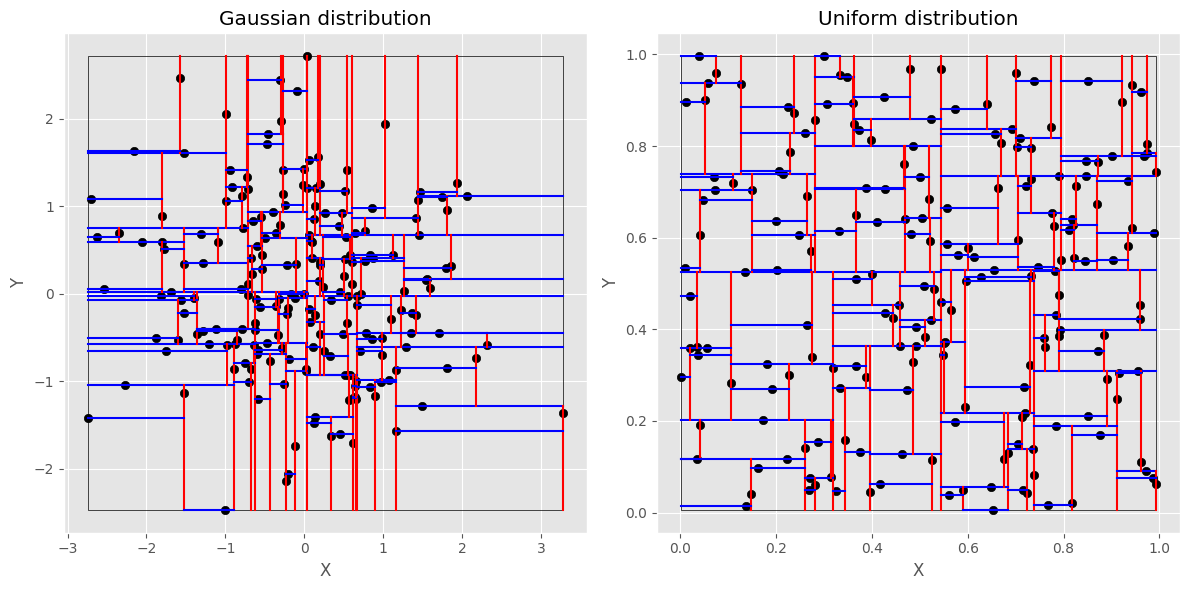

In [156]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_2d_kd_tree(csv_file, graph_title, ax):
    # Load the data from the CSV file
    data = pd.read_csv(csv_file)
    points = data[['pointX', 'pointY']].values

    min_x = min(points[:, 0])
    max_x = max(points[:, 0])
    min_y = min(points[:, 1])
    max_y = max(points[:, 1])

    # Calculate the dimensions of the black rectangle
    rect_width = max_x - min_x
    rect_height = max_y - min_y

    ax.set_title(graph_title)

    # Create a scatter plot of the points in black
    ax.scatter(points[:, 0], points[:, 1], color='black')

    # Plot the split lines
    for i in range(len(data)):
        lineStartX = data['lineStartX'][i]
        lineStartY = data['lineStartY'][i]
        lineEndX = data['lineEndX'][i]
        lineEndY = data['lineEndY'][i]
        splitDim = data['splitDim'][i]

        # Set the color based on splitDim
        if splitDim == 0:
            color = 'red'
        else:
            color = 'blue'

        ax.plot([lineStartX, lineEndX], [lineStartY, lineEndY], color=color)

    # Draw a black rectangle around the points
    rect = plt.Rectangle((min_x, min_y), rect_width, rect_height,
                         edgecolor='black', facecolor='none')
    ax.add_patch(rect)

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')


# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Generate the plots
plot_2d_kd_tree('2DKDTreeGaussian.csv', 'Gaussian distribution', ax1)
plot_2d_kd_tree('2DKDTreeUniform.csv', 'Uniform distribution', ax2)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Timing 2D Bucket KNN With Different K

- 1000 training points, Gaussian distribution
- 100 testing points, Uniform distribution

                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     26.00
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           5.75e-06
Time:                        13:22:29   Log-Likelihood:                -359.02
No. Observations:                  50   AIC:                             722.0
Df Residuals:                      48   BIC:                             725.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.091e+04     93.144    331.819      0.0

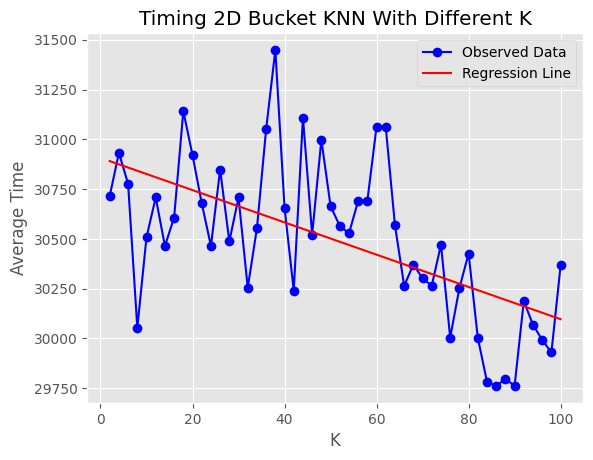

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the CSV file
data = pd.read_csv('2DBucketKNNWithDifferentK.csv')

# Extract the k and averageTime values
k_values = data['k']
average_times = data['averageTime']

# Create the plot
plt.plot(k_values, average_times, marker='o',
         color='blue', label='Observed Data')

# Set labels and title
plt.xlabel('K')
plt.ylabel('Average Time')
plt.title('Timing 2D Bucket KNN With Different K')

# Add a constant term to the independent variable
X = sm.add_constant(k_values)

# Perform linear regression
model = sm.OLS(average_times, X)
results = model.fit()

# Print the regression summary
print(results.summary())

# Get the regression line
regression_line = results.params[0] + results.params[1] * k_values

# Plot the regression line
plt.plot(k_values, regression_line, color='red', label='Regression Line')

# Add legend
plt.legend()

# Show the plot
plt.show()


In the provided context, the regression results indicate that the coefficient for `k` is negative, implying that as `k` increases, the average query time decreases. This finding contradicts the initial expectation that a larger `k` would lead to longer query times. Thus, the tests disprove the initial expectations.

Based on the simple big-O analysis, the expected time complexity of the `knnQuery` function is typically dominated by the range query and sorting operations, which have complexities of O(N) and O(N log N) respectively, where N represents the number of points retrieved from the range query. The slicing operation, selecting the `k` nearest neighbors, has a constant time complexity of O(k).

Regarding the unusual aspects of the data, it's important to note that the provided regression results do not fit the data well, as indicated by the relatively low R-squared value (0.351). This suggests that the linear model used for the regression may not accurately capture the relationship between `k` and average query time. 

Based on the observed graph, it is evident that the average query time exhibits fluctuations and, somewhat surprisingly, decreases as k increases. Despite multiple tests yielding consistent results, it remains challenging to provide a reasonable explanation for this phenomenon. The behavior defies our expectations and conventional understanding of the relationship between k and query time.


# Timing 2D Bucket KNN With Different N


- N training points, Gaussian distribution
- 100 testing points, Uniform distribution

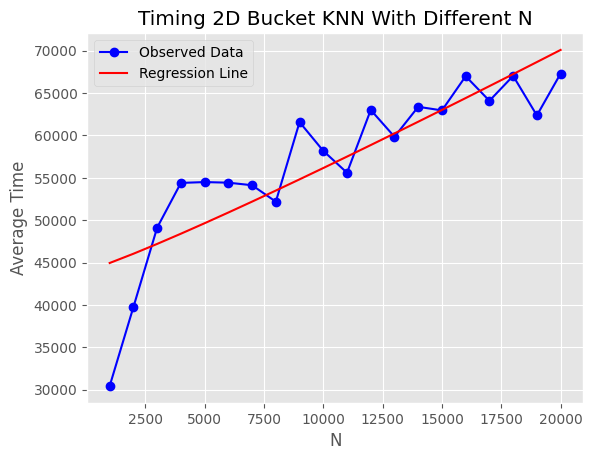

                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     46.14
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           2.32e-06
Time:                        13:22:29   Log-Likelihood:                -197.94
No. Observations:                  20   AIC:                             399.9
Df Residuals:                      18   BIC:                             401.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.404e+04   2227.841     19.766      0.0

In [158]:

import statsmodels.api as sm

# Read the CSV file
data = pd.read_csv('2DBucketKNNWithDifferentN.csv')

# Extract the n and averageTime values
n_values = data['n']
average_times = data['averageTime']
# Compute the N*logN values
n_log_n_values = n_values * np.log(n_values)

# Fit the regression model
X = sm.add_constant(n_log_n_values)
model = sm.OLS(average_times, X)
results = model.fit()

# Extract the coefficients
intercept = results.params[0]
slope = results.params[1]

# Generate the predicted values
predicted_values = intercept + slope * n_log_n_values

# Create the plot
plt.plot(n_values, average_times, color='b', marker='o', label='Observed Data')
plt.plot(n_values, predicted_values, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('N')
plt.ylabel('Average Time')
plt.title('Timing 2D Bucket KNN With Different N')

# Show the plot
plt.legend()
plt.show()

print(results.summary())


Based on the regression results, the coefficient for N log N is 0.1316, indicating a positive relationship between N log N and the average query time. This suggests that as the number of training points (N) increases, resulting in a larger N log N value, the average query time also increases.

The R-squared value of 0.719 indicates that approximately 71.9% of the variation in the average query time can be explained by the N log N value. This suggests a moderately strong relationship between N log N and the average query time.

Based on the simple big-O analysis, we would expect the algorithm's runtime to follow a trend of O(N log N). This aligns with the finding that increasing the N log N value leads to longer query times. The range query and sorting operations, which typically have a time complexity of O(N log N), are likely the dominant factors influencing the overall runtime.

Regarding unusual aspects of the data, it's important to consider the specific characteristics of the dataset. The algorithm is tested with N training points generated from a Gaussian distribution and 100 testing points from a Uniform distribution. These distributions may contribute to the observed relationship between N log N and the average query time. 

In summary, the regression analysis confirms our expectation that increasing the N log N value leads to longer average query times. 

# Timing Quad Tree KNN With Different Max Points Per Leaf

- 1000 training points, Gaussian distributed
- 100 testing points, Uniform distributed

                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     60.75
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           4.51e-10
Time:                        13:22:29   Log-Likelihood:                -334.88
No. Observations:                  50   AIC:                             673.8
Df Residuals:                      48   BIC:                             677.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5850.8824     57.466  

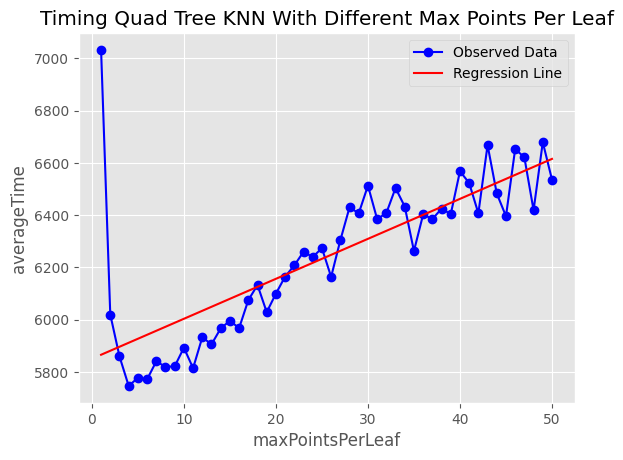

In [159]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('QuadTreeWithDifferentMaxPointsPerLeaf.csv')

# Extract the columns from the DataFrame
maxPointsPerLeaf = data['maxPointsPerLeaf']
averageTime = data['averageTime']

# Create the plot
plt.plot(maxPointsPerLeaf, averageTime, color='blue',
         marker='o', label='Observed Data')
plt.xlabel('maxPointsPerLeaf')
plt.ylabel('averageTime')
plt.title('Timing Quad Tree KNN With Different Max Points Per Leaf')
plt.grid(True)

# Perform linear regression
# Add a constant term to the predictor variable
X = sm.add_constant(maxPointsPerLeaf)
model = sm.OLS(averageTime, X)
results = model.fit()

# Print the regression results
print(results.summary())

# Generate regression line values
x_vals = np.linspace(min(maxPointsPerLeaf), max(maxPointsPerLeaf), 100)
y_vals = results.params[0] + results.params[1] * x_vals

# Add regression line to the plot
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

# Add legend
plt.legend()

# Show the plot
plt.show()



Based on our expectations, we initially anticipated that the average time would decrease as we increased the maxPointsPerLeaf value in the Quad Tree KNN algorithm. This expectation stemmed from the assumption that having too few points per leaf might result in excessive searching, while having all points in one leaf would represent a naive KNN approach without any optimization. We hypothesized that there would be a point where a balance is achieved, leading to an optimal tradeoff between search efficiency and optimization.

The regression results generally support our hypothesis, indicating a positive coefficient of 12.4558 for the maxPointsPerLeaf variable when maxPointsPerLeaf > 4. Additionally, we observed a significant decrease in the coefficient from 1 to 4, which aligns with our initial expectation.

# Timing KD Tree KNN With Different Dimensions


- 1000 training points, Gaussian distribution
- 100 testing points, Uniform distribution

                            OLS Regression Results                            
Dep. Variable:            averageTime   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     340.9
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           3.40e-05
Time:                        13:22:29   Log-Likelihood:                -54.913
No. Observations:                   7   AIC:                             115.8
Df Residuals:                       4   BIC:                             115.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x_squared    647.7500     89.136      7.267      0.0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


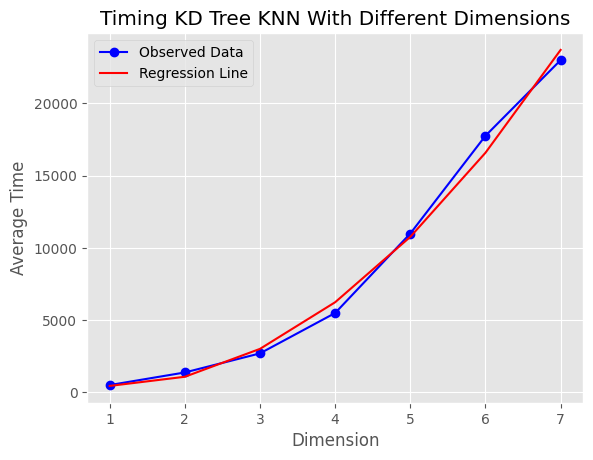

In [160]:


# Read the CSV file into a pandas DataFrame
data = pd.read_csv('KDTreeWithDifferentDimension.csv')

# Extract the columns from the DataFrame
dimension = data['dimension']
averageTime = data['averageTime']

# Create the plot
plt.plot(dimension, averageTime, marker='o',
         color='blue', label='Observed Data')

# Create the predictors matrix
X = pd.DataFrame({'x_squared': dimension ** 2, 'x': dimension, 'constant': 1})

# Create a linear regression model
regression = sm.OLS(averageTime, X)

# Fit the model to the data
results = regression.fit()

# Print the regression results
print(results.summary())

# Generate predictions from the fitted model
predictions = results.predict(X)

# Plot the regression line
plt.plot(dimension, predictions, color='red', label='Regression Line')

# Set plot labels and title
plt.xlabel('Dimension')
plt.ylabel('Average Time')
plt.title('Timing KD Tree KNN With Different Dimensions')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


The R-squared value of 0.994 indicates that the regression model explains approximately 99.4% of the variation in the averageTime variable, suggesting a strong fit. However, it's important to note that the reliability of the results may be limited due to the small number of observations (7).

The regression results partially support the expected hypothesis. The coefficient for the x_squared variable confirms the anticipated positive relationship with averageTime, while the coefficients for the x variable and the constant term do not provide significant evidence to support the expectations.

In theory, as the dimension (Dim) increases, the performance of the KNN query tends to deteriorate due to the curse of dimensionality, which leads to increased sparsity in the data and reduces the effectiveness of the tree structure.

In general, the regression results align with our expectations.